In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# for iris
import sklearn.datasets as datasets
# for PCA
import sklearn.decomposition as decomp
# for agnes
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
# for k-means
from sklearn.cluster import KMeans
# for GMM
from sklearn.mixture import GaussianMixture

In [2]:
# irisデータを読み込み、構成を調べる
iris = datasets.load_iris()
for entry in iris.keys():
    print(entry)

data
target
target_names
DESCR
feature_names


In [3]:
# feature_names を確認する
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 主成分分析(PCA)

In [4]:
data = iris['data']
pca = decomp.PCA(n_components=2).fit(data)

In [5]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [6]:
pca.singular_values_

array([25.08986398,  6.00785254])

In [7]:
# PCAの結果を基にデータ変換（次元削減）
values = pca.transform(data)

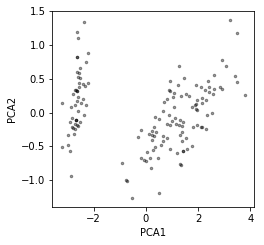

In [8]:
# 散布図に描画
fig = plt.figure()
fig.set_size_inches(4, 4)
plt.plot(values[:,0], values[:,1], 'k.', ms=5, alpha=.4)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.subplots_adjust(left=.2, bottom=.2)
fig.savefig("images/PCA_iris_plotted.png")
plt.show()

## 凝集型の階層クラスタリング(AGNES)

### 総当たり距離の計算

In [9]:
dists = pdist(values)

`scipy.spatial.distance.squareform()` を使って距離を画像表示します。

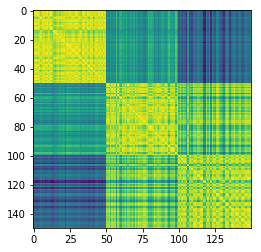

In [10]:
fig = plt.figure()
plt.imshow(squareform(dists), cmap=plt.get_cmap('viridis_r'))
fig.savefig("images/pdist_iris_plotted.png")
plt.show()

### 階層型クラスタリングの実行

In [11]:
Z = linkage(dists, 'ward')

In [12]:
Z

array([[9.00000000e+00, 3.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 1.50000000e+02, 0.00000000e+00, 3.00000000e+00],
       [1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.15000000e+02, 1.48000000e+02, 4.28449773e-03, 2.00000000e+00],
       [1.70000000e+01, 2.80000000e+01, 8.50284793e-03, 2.00000000e+00],
       [1.60000000e+01, 3.20000000e+01, 2.51817197e-02, 2.00000000e+00],
       [5.10000000e+01, 7.50000000e+01, 3.43845015e-02, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 3.66537884e-02, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 4.49849576e-02, 2.00000000e+00],
       [0.00000000e+00, 4.00000000e+00, 4.49849576e-02, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 4.49849576e-02, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 4.49849576e-02, 2.00000000e+00],
       [1.13000000e+02, 1.19000000e+02, 4.87606389e-02, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 5.07884487e

In [13]:
Z[0]

array([ 9., 34.,  0.,  2.])

In [14]:
Z[:,0]

array([  9.,  37., 101., 115.,  17.,  16.,  51., 128.,  29.,   0.,  57.,
       116., 113.,  19.,  12.,  59.,  67.,  21.,  55., 126.,   1., 120.,
         7.,  10.,  56., 123., 112.,  92., 102.,  26.,  63.,   2., 154.,
        95., 107., 145.,  70.,  14.,  20.,  74.,  62.,  77.,  88.,  36.,
        72.,   3.,  11.,   8., 133.,  25.,  84., 105.,  40., 164.,  23.,
        53., 129., 161.,  78.,  82., 163.,   5., 124.,  61., 180.,  65.,
       103.,  64., 114.,  69.,  44., 100., 109., 139., 169.,  76., 172.,
       147., 151., 108.,  54.,  68.,  35.,  81.,  97., 176.,  42., 121.,
       179.,  90., 183.,  50., 152., 194., 193., 125., 206., 117.,  13.,
        98.,  15., 225., 134., 203., 200., 202., 205., 223., 224., 232.,
       221., 118., 213., 215., 237., 155.,  60., 184., 191., 214., 220.,
        41., 239., 211.,  22., 241., 217., 246., 252., 106., 270., 258.,
       261., 272., 250., 268., 259., 269., 247., 276., 277., 280., 281.,
       266., 286., 288., 292., 295., 294.])

In [15]:
Z[:,1]

array([ 34., 150., 142., 148.,  28.,  32.,  75., 132.,  30.,   4.,  93.,
       137., 119.,  46.,  47.,  80.,  99.,  27.,  66., 127.,  45., 144.,
        39.,  48.,  58., 149., 136., 166., 143.,  43.,  73.,   6., 159.,
        96., 130., 153., 138.,  33.,  31.,  85.,  94., 110., 177., 173.,
        83., 170.,  49.,  38., 175., 158., 168., 122., 182., 195.,  24.,
        89., 171., 185.,  91., 192., 167.,  18., 140.,  71., 208., 156.,
       111.,  79., 146., 165., 188., 104., 135., 141., 186.,  86., 196.,
       207., 199., 157., 174.,  87., 181., 219., 189., 212., 197., 162.,
       204., 190., 209.,  52., 218., 198., 210., 178., 245., 131., 236.,
       160., 187., 230., 216., 228., 231., 226., 233., 235., 243., 253.,
       229., 201., 240., 251., 242., 244., 249., 222., 227., 234., 238.,
       248., 262., 265., 255., 263., 256., 257., 260., 254., 274., 264.,
       267., 279., 273., 278., 271., 275., 282., 283., 285., 284., 287.,
       289., 291., 290., 293., 296., 297.])

In [16]:
Z[27]

array([9.20000000e+01, 1.66000000e+02, 8.43273028e-02, 3.00000000e+00])

### デンドログラムでの表示

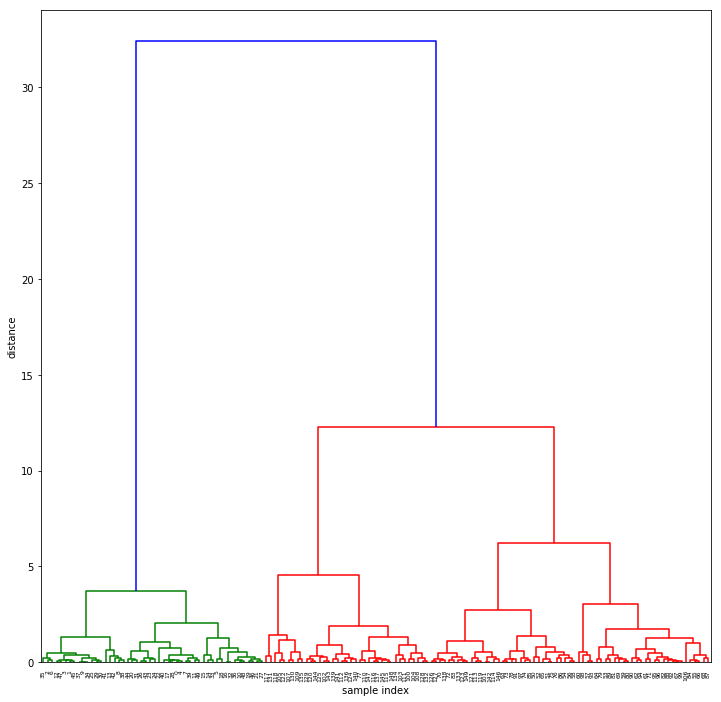

In [17]:
fig = plt.figure(figsize=(12, 12))
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=6.,  # font size for the x axis labels
)
fig.savefig('images/dendrogram_iris_plotted.png')
plt.show()

## k-平均法(K-means)

In [18]:
def calc_means(labels, values):
    """クラスタ中心を計算し直し、(clusters, features)の形の配列で返す"""
    return np.stack([values[labels == lab].mean(0) for lab in sorted(set(labels))], axis=0)

def assign_labels(means, values):
    """クラスタ中心meansを用いてvaluesのデータをクラスタに割り当て、(labels,)の形の配列で返す"""
    size   = values.shape[0]
    labels = np.empty(size, dtype=int)
    for i in range(size):
        pos  = values[i].reshape((1,-1)) # meansと形を揃える
        dist = ((means - pos)**2).sum(1)
        labels[i] = dist.argmin()
    return labels

def kmeans(values, n_components=3, history=False, random_state=None, ctol=1e-6):
    """k-平均法をおこなう。valuesは(observations, features)の形の配列。
    クラスタ中心の変化がctol未満になるまで、イテレーションを続ける。
    クラスタへの帰属ラベルを(labels,)の形で返す。
    
    history=Trueにすると、初期値以降のラベルの変遷を配列の形で返す。
    """
    if random_state is None:
        random_state = 539167
    np.random.seed(random_state)
    
    size = values.shape[0]
    prev_means     = None
    prev_labels    = np.random.choice(np.arange(n_components), size=size, replace=True)
    labels_history = [prev_labels]
    
    while True:
        means       = calc_means(prev_labels, values)
        if prev_means is not None:
            dist = np.sqrt(((prev_means - means)**2).sum(1)).mean()
            if dist < ctol:
                break
        labels      = assign_labels(means, values)
        
        if history == True:
            labels_history.append(labels)
        else:
            labels_history[0] = labels
        prev_labels = labels
        prev_means  = means
    
    if history == True:
        return labels_history
    else:
        return prev_labels

In [19]:
n_components = 3
_values = values #iris['data'][:,2:]
history = kmeans(_values, n_components=n_components, history=True)

In [20]:
len(history)

12

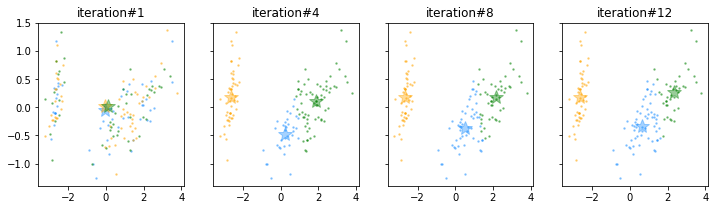

In [21]:
its = (0, 3, 7, 11)
colors = ['dodgerblue', 'orange', 'green']
fig, axes = plt.subplots(1, len(its), sharex=True, sharey=True, figsize=(12, 3))
for i, it in enumerate(its):
    labels = history[it]
    for j in range(n_components):
        group = (labels == j)
        axes[i].set_title(f"iteration#{it+1}")
        axes[i].plot(_values[group,0], _values[group,1], '.', color=colors[j], ms=3, alpha=.4) #, label=f"cluster#{j}")
        axes[i].plot(_values[group,0].mean(), _values[group,1].mean(), '*', color=colors[j], ms=15, alpha=.4)
# plt.legend(frameon=False)
fig.savefig('images/kmeans_iris_history.png')
plt.show()

### 実際のk-平均法


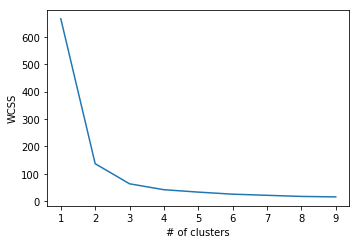

In [22]:
wcss = []
n_comps = np.arange(1, 10)

for k in n_comps:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10).fit(values)
    wcss.append(km.inertia_)

fig = plt.figure(figsize=(6, 4))
plt.plot(n_comps, wcss)
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.subplots_adjust(left=.2, bottom=.2)
fig.savefig('images/kmeans_iris_wcss.png')
plt.show()

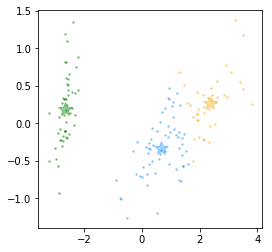

In [23]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=539167).fit(values)
labels = km.labels_

fig = plt.figure(figsize=(4,4))
for j in range(3):
    group = (labels == j)
    plt.plot(_values[group,0], _values[group,1], '.', color=colors[j], ms=3, alpha=.4) #, label=f"cluster#{j}")
    plt.plot(_values[group,0].mean(), _values[group,1].mean(), '*', color=colors[j], ms=15, alpha=.4)
# plt.legend(frameon=False)
fig.savefig('images/kmeans_iris_sklearn.png')
plt.show()

In [24]:
labeled = labels.copy()
labeled[labels == 2] = 0
labeled[labels == 0] = 1
labeled[labels == 1] = 2
validation = labeled != iris['target']

np.count_nonzero(validation)/(validation.size)

0.11333333333333333

## 混合ガウスモデル(GMM)

In [25]:
gmm = GaussianMixture(n_components=3, n_init=10, random_state=539167).fit(values)
labels = gmm.predict(values)

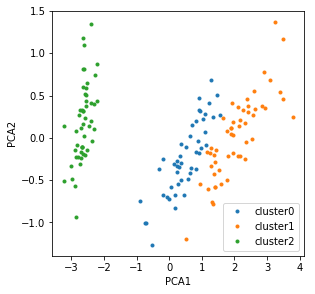

In [26]:
fig = plt.figure(figsize=(5,5))
for lab in sorted(set(labels)):
    group = (labels == lab)
    plt.plot(values[group,0], values[group,1], '.', label=f"cluster{lab}")
plt.legend()
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.subplots_adjust(bottom=.2, left=.2)
fig.savefig("images/gmm_iris_plotted.png")
plt.show()

In [27]:
aic = []
bic = []
n_comps = np.arange(1,10)

for k in n_comps:
    gmm = GaussianMixture(n_components=k, n_init=10).fit(values)
    aic.append(gmm.aic(values))
    bic.append(gmm.bic(values))

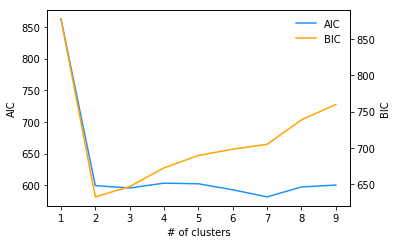

In [28]:
# グラフで描画
fig = plt.figure(figsize=(6, 4))
plt.plot(n_comps, aic, c='dodgerblue', label='AIC')
plt.xlabel("# of clusters")
plt.ylabel("AIC")
ax = plt.gca().twinx()
plt.plot((np.nan,), (np.nan,), c='dodgerblue', label='AIC')
ax.plot(n_comps, bic, c='orange', label='BIC')
ax.set_ylabel("BIC")
plt.subplots_adjust(left=.2, bottom=.2)
plt.legend(frameon=False)
fig.savefig('images/gmm_iris_ncomps.png')
plt.show()